In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [4]:
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

<AxesSubplot:xlabel='age', ylabel='count'>

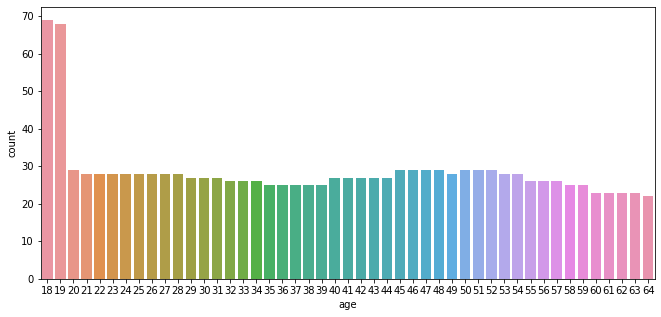

In [7]:
plt.figure(figsize=(11,5))
sns.countplot(data=df,x='age')


c:\Users\lenovo\Desktop\ML_Project\ML\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

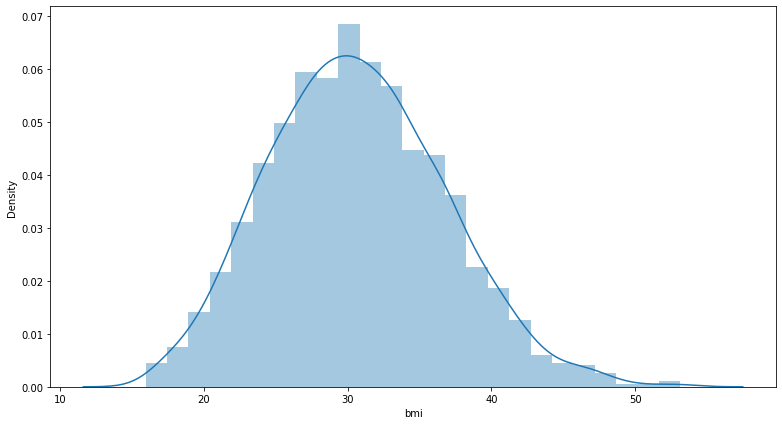

In [8]:
plt.figure(figsize=(13,7))
sns.distplot(a=df["bmi"],kde=True)


In [9]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

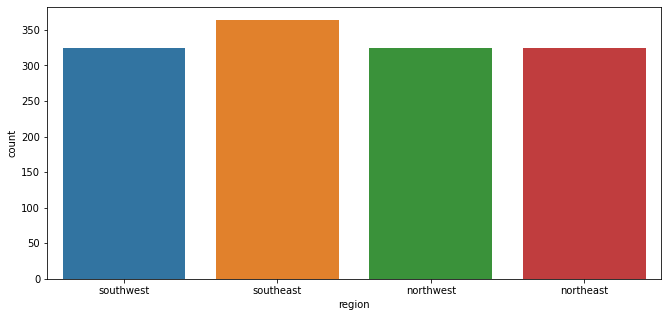

In [10]:
plt.figure(figsize=(11,5))
sns.countplot(data=df,x='region')


In [11]:
df["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

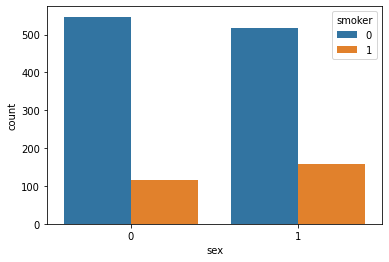

In [12]:
sns.countplot(x="sex",hue="smoker",data=df)

<AxesSubplot:xlabel='age', ylabel='count'>

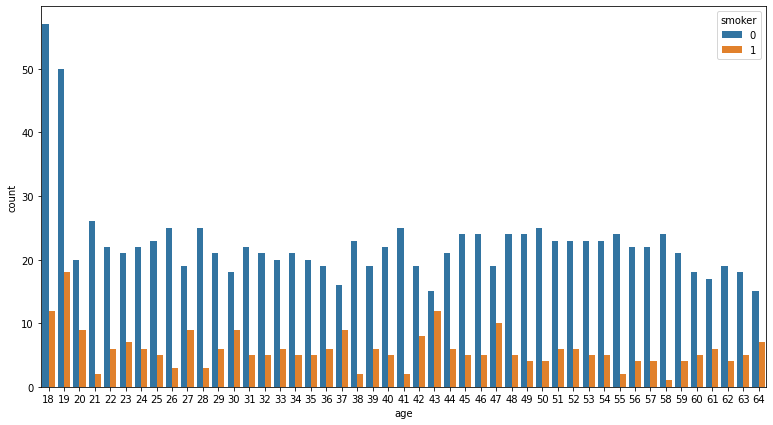

In [13]:
plt.figure(figsize=(13,7))
sns.countplot(x="age",hue="smoker",data=df)

<AxesSubplot:xlabel='region', ylabel='count'>

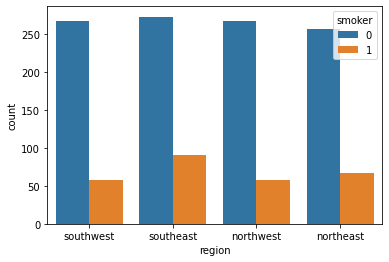

In [14]:
sns.countplot(x="region",hue="smoker",data=df)

In [15]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df["region_code"] = enc.fit_transform(df[["region"]])
df.head()



,age,sex,bmi,children,smoker,region,charges,region_code
0,19,0,27.900,0,1,southwest,16884.92400,3.0
1,18,1,33.770,1,0,southeast,1725.55230,2.0
2,28,1,33.000,3,0,southeast,4449.46200,2.0
3,33,1,22.705,0,0,northwest,21984.47061,1.0
4,32,1,28.880,0,0,northwest,3866.85520,1.0


In [16]:
df.drop("region",axis=1,inplace=True)
df.head()

,age,sex,bmi,children,smoker,charges,region_code
0,19,0,27.900,0,1,16884.92400,3.0
1,18,1,33.770,1,0,1725.55230,2.0
2,28,1,33.000,3,0,4449.46200,2.0
3,33,1,22.705,0,0,21984.47061,1.0
4,32,1,28.880,0,0,3866.85520,1.0


<AxesSubplot:>

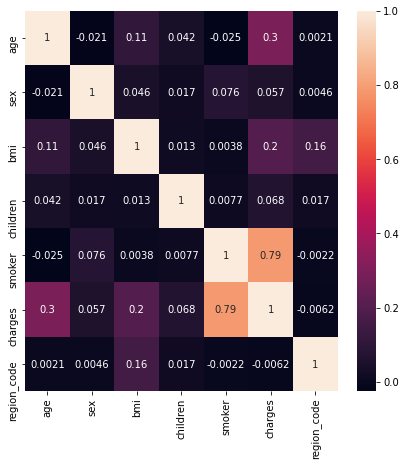

In [17]:
plt.figure(figsize=(7,7))
sns.heatmap(data=df.corr(),annot=True)

In [18]:
y=df.charges
df.drop("charges",axis=1,inplace=True)
X=df

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)
print(X_train.shape,X_test.shape)

(1070, 6) (268, 6)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
Linear_Regression=LinearRegression()
Random_Forest_Regressor=RandomForestRegressor(n_estimators=250)
model=[Linear_Regression,Random_Forest_Regressor]


In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
for m in model:
    print("Model :",m)
    scores = -1 * cross_val_score(m, X_train, y_train,cv=5,scoring='neg_mean_absolute_error')
    print("MAE CV scores:\n", scores)
    m.fit(X_train,y_train)
    y_pred= m.predict(X_test)
    
    rf_r2_score = r2_score(y_test, y_pred)
    print('R square Score = ', round(rf_r2_score, 3))
    gb_mse = mean_squared_error(y_test, y_pred)
    gb_rmse = np.sqrt(gb_mse)
    print('Root Mean Squared Error = ', round(gb_rmse, 3))
    print("")



Model : LinearRegression()
MAE CV scores:
 [4375.35018078 3837.38508781 4382.74036749 4340.74360624 4041.97831395]
R square Score =  0.762
Root Mean Squared Error =  5956.565

Model : RandomForestRegressor(n_estimators=250)
MAE CV scores:
 [2932.68250954 2540.18630533 3158.95407168 2820.05471807 2631.49997573]
R square Score =  0.859
Root Mean Squared Error =  4594.115



In [22]:
from joblib import dump,load
dump(Random_Forest_Regressor,"Medical.joblib")

['Medical.joblib']

In [23]:
features = np.array([[19,0,27.900,0,1,3.0]])
Random_Forest_Regressor.predict(features)

array([17181.253185])